## Overview

This notebook allows to following all the processing perfromed in the Behavioral_Analysis notebook ( which run behavioral_analysis functions)


In [38]:
import os
import pickle
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt #Creation de graphiques et de visualisations comme matlab
from matplotlib.patches import Polygon #Creation de graphiques et de visualisations comme matlab
from matplotlib import cm
import matplotlib.patches as mpatches
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
from scipy.ndimage import gaussian_filter as smooth
#import gc
import glob
#import time
from behavior_analysis_functions import list_sessions_analyzed, \
                                    process_session, html_mouse, load_data, MOUSE_STRING


In [5]:
# the path_to_data_folder is the path of the folder where you store your different mice.

# Windows:
# path_to_data_folder='C:'+os.sep+'Users'+os.sep+'MORVAN'+os.sep+'Documents'+os.sep+'patchouris'+os.sep+'Sample_Data'+os.sep
# Linux:
# path_to_data_folder '/home/david/Documents/Code/ForagingProject/Patchouris/patchouris/Sample_Data/'
# MacOs
# path_to_data_folder = '/Users/davidrobbe/Documents/Science/Data/ForagingMice/'

path_to_data_folder='/home/david/Documents/David/Data/'
path_to_data_folder='/LocalData/ForagingMice/JAK2Data'
pattern_of_MOU_Folders = os.path.join(path_to_data_folder, "MOU*")
#path_to_data_folder = '/Users/davidrobbe/Documents/Science/Data/ForagingMice/'

# List all mice in the data folder (If you want to process all the mice in your data folder),
mice_list = [os.path.basename(path) for path in glob.glob(pattern_of_MOU_Folders)]
mice_list=sorted(mice_list)
print(f'Found {len(mice_list)} {"mice" if len(mice_list) > 1 else "mouse"} in the data folder:')


#If you want to process a subset of mice uncomment the line below and comment the 2 lines above

#mice_list: list[str] = ["MOU2334"]  # For processing  a single mice. Equivalent to mice_list = ["MOU2334"] but more correct as it forces to create a list of string
#mice_list=['MOU2329', 'MOU2330', 'MOU2331', 'MOU2332', 'MOU2333', 'MOU2334']
#print(f'Found {len(mice_list)} {"mice" if len(mice_list) > 1 else "mouse"} in the data folder:')

session_list = {}
for mouse in mice_list:
    mouse_folder = os.path.join(path_to_data_folder,mouse)
    session_list[mouse] = sorted([name for name in os.listdir(mouse_folder)
                           if os.path.isdir(os.path.join(mouse_folder, name))
                           and name.startswith('MOU')])
    nb_sessions = len(session_list[mouse])
    print(f'Hello, I\'m {mouse}! I have foraged for {nb_sessions} sessions:')
    print(session_list[mouse], '\n')








Found 6 mice in the data folder:
Hello, I'm MOU2329! I have foraged for 18 sessions:
['MOU2329_20240607-1315', 'MOU2329_20240607-1714', 'MOU2329_20240610-0936', 'MOU2329_20240610-1336', 'MOU2329_20240611-0915', 'MOU2329_20240611-1324', 'MOU2329_20240612-0918', 'MOU2329_20240612-1341', 'MOU2329_20240613-0914', 'MOU2329_20240613-1405', 'MOU2329_20240614-0820', 'MOU2329_20240614-1331', 'MOU2329_20240617-0829', 'MOU2329_20240617-1420', 'MOU2329_20240618-0829', 'MOU2329_20240618-1451', 'MOU2329_20240619-0828', 'MOU2329_20240619-1406'] 

Hello, I'm MOU2330! I have foraged for 18 sessions:
['MOU2330_20240607-1335', 'MOU2330_20240607-1733', 'MOU2330_20240610-0956', 'MOU2330_20240610-1357', 'MOU2330_20240611-0936', 'MOU2330_20240611-1342', 'MOU2330_20240612-0937', 'MOU2330_20240612-1400', 'MOU2330_20240613-0933', 'MOU2330_20240613-1424', 'MOU2330_20240614-0840', 'MOU2330_20240614-1351', 'MOU2330_20240617-0848', 'MOU2330_20240617-1438', 'MOU2330_20240618-0848', 'MOU2330_20240618-1509', 'MOU2330_

We just print the list of mice, the dictionnany of sessions across mice and then we will choose a single mice and single session for illustration purpose

In [6]:
mice_list

['MOU2329', 'MOU2330', 'MOU2331', 'MOU2332', 'MOU2333', 'MOU2334']

In [7]:
session_list

{'MOU2329': ['MOU2329_20240607-1315',
  'MOU2329_20240607-1714',
  'MOU2329_20240610-0936',
  'MOU2329_20240610-1336',
  'MOU2329_20240611-0915',
  'MOU2329_20240611-1324',
  'MOU2329_20240612-0918',
  'MOU2329_20240612-1341',
  'MOU2329_20240613-0914',
  'MOU2329_20240613-1405',
  'MOU2329_20240614-0820',
  'MOU2329_20240614-1331',
  'MOU2329_20240617-0829',
  'MOU2329_20240617-1420',
  'MOU2329_20240618-0829',
  'MOU2329_20240618-1451',
  'MOU2329_20240619-0828',
  'MOU2329_20240619-1406'],
 'MOU2330': ['MOU2330_20240607-1335',
  'MOU2330_20240607-1733',
  'MOU2330_20240610-0956',
  'MOU2330_20240610-1357',
  'MOU2330_20240611-0936',
  'MOU2330_20240611-1342',
  'MOU2330_20240612-0937',
  'MOU2330_20240612-1400',
  'MOU2330_20240613-0933',
  'MOU2330_20240613-1424',
  'MOU2330_20240614-0840',
  'MOU2330_20240614-1351',
  'MOU2330_20240617-0848',
  'MOU2330_20240617-1438',
  'MOU2330_20240618-0848',
  'MOU2330_20240618-1509',
  'MOU2330_20240619-0846',
  'MOU2330_20240619-1424'],
 'MO

In [8]:
illustration_mouse_folder_path=os.path.join(path_to_data_folder,mice_list[0])
print(illustration_mouse_folder_path)

/LocalData/ForagingMice/JAK2Data/MOU2329


In [9]:
illustration_foragiong_session=session_list[mice_list[0]][11]
print(illustration_foragiong_session)

MOU2329_20240614-1331


Some basic information about the foraging environment.

In [32]:
######################################
# maze information
######################################

#Mice have to run around 4 towers to obtain rewarard. Rewards are delivered when a mouse switch from one trapeze to another concurrent trapeze
#We therefore need  the coordinate of the 4 towers and the trapeze. The coordinate are given in the reference frame of the video. 
# The video has a resolution of 512 pixeld in trapeze_width and in height. The point 0,0 is the left top corner.

video_resolution = 512, 512 # this gives the resolution in pixel of the video recorded(trajectory of the mice in the maze)  
trapeze_width = 50 # rewards are delivered in the maze around 4 towers,  when mice a switch from one trapze to another



#        +-----------------+                            +-----------------+
#        | \  Trapeze N  / |                            | \  Trapeze N  / |
#        |  +-----------+  |                            |  +-----------+  |
#        |  |           |  |                            |  |           |  |
#        |TW|   Tower   |TE|                            |TW|   Tower   |TE|
#        |  |     NW    |  |                            |  |     NE    |  |
#        |  |           |  |                            |  |           |  |
#        |  +-----------+  |                            |  +-----------+  |
#        | /    Trap S   \ |                            | /    Trap S   \ |
#        +-----------------+                            +-----------------+





#        +-----------------+                            +-----------------+
#        | \  Trapeze N  / |                            | \  Trapeze N  / |
#        |  +-----------+  |                            |  +-----------+  |
#        |  |           |  |                            |  |           |  |
#        |TW|   Tower   |TE|                            |TW|   Tower   |TE|
#        |  |     SW    |  |                            |  |     SE    |  |
#        |  |           |  |                            |  |           |  |
#        |  +-----------+  |                            |  +-----------+  |
#        | /    Trap S   \ |                            | /    Trap S   \ |
#        +-----------------+                            +-----------------+



#XY coordinates for each tower in 512*512 pixel resolution
# NWtower_coords = [[104, 125], [173, 125], [173, 201], [104, 201]]
# NEtower_coords = [[330, 120], [400, 120], [400, 200], [330, 200]]
# SWtower_coords = [[109, 351], [181, 351], [181, 410], [109, 410]]
# SEtower_coords = [[330, 350], [400, 350], [400, 410], [330, 410]]


towers_coordinates = {
    "NW": [[104, 125], [173, 125], [173, 201], [104, 201]],
    "NE": [[330, 120], [400, 120], [400, 200], [330, 200]],
    "SW": [[109, 351], [181, 351], [181, 410], [109, 410]],
    "SE": [[330, 350], [400, 350], [400, 410], [330, 410]]
}




NW
[[104, 125], [173, 125], [173, 201], [104, 201], [104, 125]]
138.5 163.0
NE
[[330, 120], [400, 120], [400, 200], [330, 200], [330, 120]]
365.0 160.0
SW
[[109, 351], [181, 351], [181, 410], [109, 410], [109, 351]]
145.0 380.5
SE
[[330, 350], [400, 350], [400, 410], [330, 410], [330, 350]]
365.0 380.0


/tmp/ipykernel_163914/3159172867.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


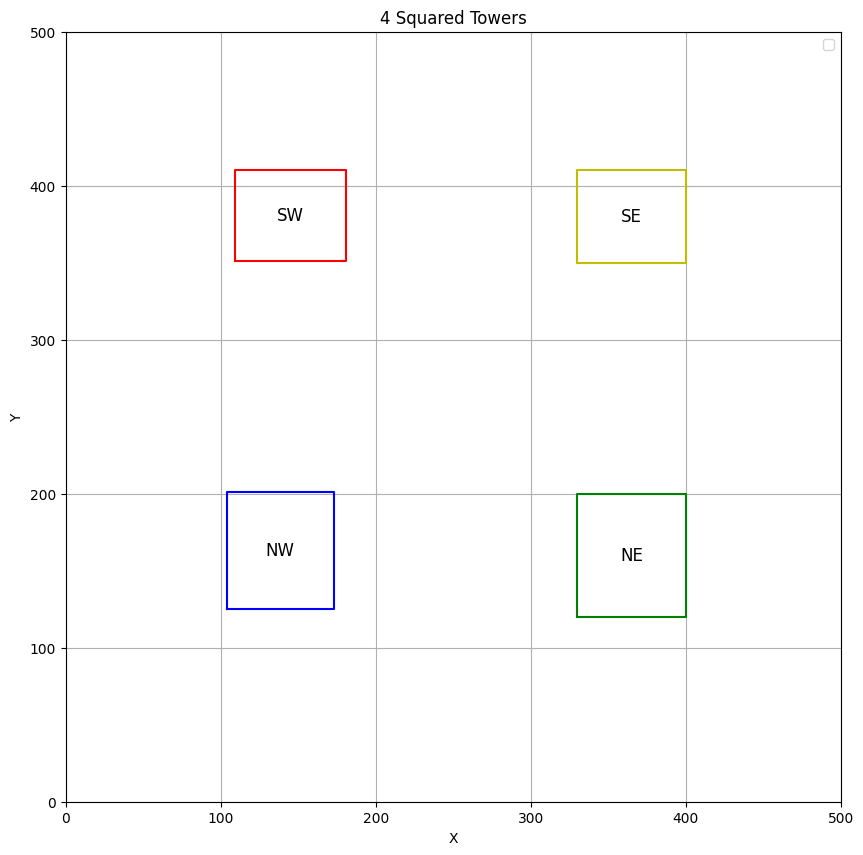

In [39]:
# Function to plot a square tower
def plot_square(vertices, color, label):
    # Close the square polygon by appending the first vertex to the end
    closed_vertices = vertices + [vertices[0]]
    closed_vertices = list(zip(*closed_vertices))  # Transpose vertices for plotting (x, y)
    plt.plot(closed_vertices[0], closed_vertices[1], color)
    print(label)
    print(vertices)
    # Calculate the center of the square for labeling. the first point and last point are repeated so we don't take in account the last point
    center_x = sum([v[0] for v in vertices[:-1]]) / 4
    center_y = sum([v[1] for v in vertices[:-1]]) / 4
    print(center_x,center_y)
    plt.text(center_x, center_y, label, fontsize=12, ha='center', va='center')

# Initialize plot
plt.figure(figsize=(10, 10))

# Colors for the towers
colors = {'NW': 'b-', 'NE': 'g-', 'SW': 'r-', 'SE': 'y-'}

# Plot each tower
for tower_name, vertices in towers_coordinates.items():
    plot_square(vertices, colors[tower_name], tower_name)

# Set plot limits and labels
plt.xlim(0, 500)
plt.ylim(0, 500)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('4 Squared Towers')
plt.grid(True)
plt.legend()

# Display plot
plt.show()


In [40]:



trapeze_width = 50 # rewards are delivered in the maze around 4 towers,  when mice a switch from one trapze to another



def trapeze_coordinates_from_tower(tower_coordinates, trapeze_width):
    """
    generate the trapezes coordinates surrounding a tower
    inputs:
    tower_coordinates - coordinates of the 4 corners of a tower [[Xa, Ya], [Xb, Yb], [Xc, Yc], [Xd, Yd]]
    trapeze_width - width of the trapeze in pixels
    outputs:
    coordinates [[Xa, Ya], [Xb, Yb], [Xc, Yc], [Xd, Yd]] for the 4 trapezes (N, E, S, W).
    
    
    """

    N = [tower_coordinates[0], tower_coordinates[1], [tower_coordinates[1][0]+trapeze_width, tower_coordinates[1][1]+trapeze_width], [tower_coordinates[0][0]-trapeze_width, tower_coordinates[0][1]+trapeze_width]]
    E = [tower_coordinates[1], tower_coordinates[2], [tower_coordinates[2][0]+trapeze_width, tower_coordinates[2][1]-trapeze_width], [tower_coordinates[1][0]+trapeze_width, tower_coordinates[1][1]+trapeze_width]]
    S = [tower_coordinates[2], tower_coordinates[3], [tower_coordinates[3][0]-trapeze_width, tower_coordinates[3][1]-trapeze_width], [tower_coordinates[2][0]+trapeze_width, tower_coordinates[2][1]-trapeze_width]]
    W = [tower_coordinates[3], tower_coordinates[0], [tower_coordinates[0][0]-trapeze_width, tower_coordinates[0][1]+trapeze_width], [tower_coordinates[3][0]-trapeze_width, tower_coordinates[3][1]-trapeze_width]]
    return N, E, S, W






# Initialize dictionary to store trapeze coordinates
all_trapezes_coordinates = {"NW": {}, "NE": {}, "SW": {}, "SE": {}}

# Iterate over each tower and compute trapeze coordinates
for tower_name, tower_coordinates in towers_coordinates.items():
    all_trapezes_coordinates[tower_name]["N"], \
    all_trapezes_coordinates[tower_name]["E"], \
    all_trapezes_coordinates[tower_name]["S"], \
    all_trapezes_coordinates[tower_name]["W"] = trapeze_coordinates_from_tower(tower_coordinates, trapeze_width)

# Example usage
print(all_trapezes_coordinates)


{'NW': {'N': [[104, 125], [173, 125], [223, 175], [54, 175]], 'E': [[173, 125], [173, 201], [223, 151], [223, 175]], 'S': [[173, 201], [104, 201], [54, 151], [223, 151]], 'W': [[104, 201], [104, 125], [54, 175], [54, 151]]}, 'NE': {'N': [[330, 120], [400, 120], [450, 170], [280, 170]], 'E': [[400, 120], [400, 200], [450, 150], [450, 170]], 'S': [[400, 200], [330, 200], [280, 150], [450, 150]], 'W': [[330, 200], [330, 120], [280, 170], [280, 150]]}, 'SW': {'N': [[109, 351], [181, 351], [231, 401], [59, 401]], 'E': [[181, 351], [181, 410], [231, 360], [231, 401]], 'S': [[181, 410], [109, 410], [59, 360], [231, 360]], 'W': [[109, 410], [109, 351], [59, 401], [59, 360]]}, 'SE': {'N': [[330, 350], [400, 350], [450, 400], [280, 400]], 'E': [[400, 350], [400, 410], [450, 360], [450, 400]], 'S': [[400, 410], [330, 410], [280, 360], [450, 360]], 'W': [[330, 410], [330, 350], [280, 400], [280, 360]]}}


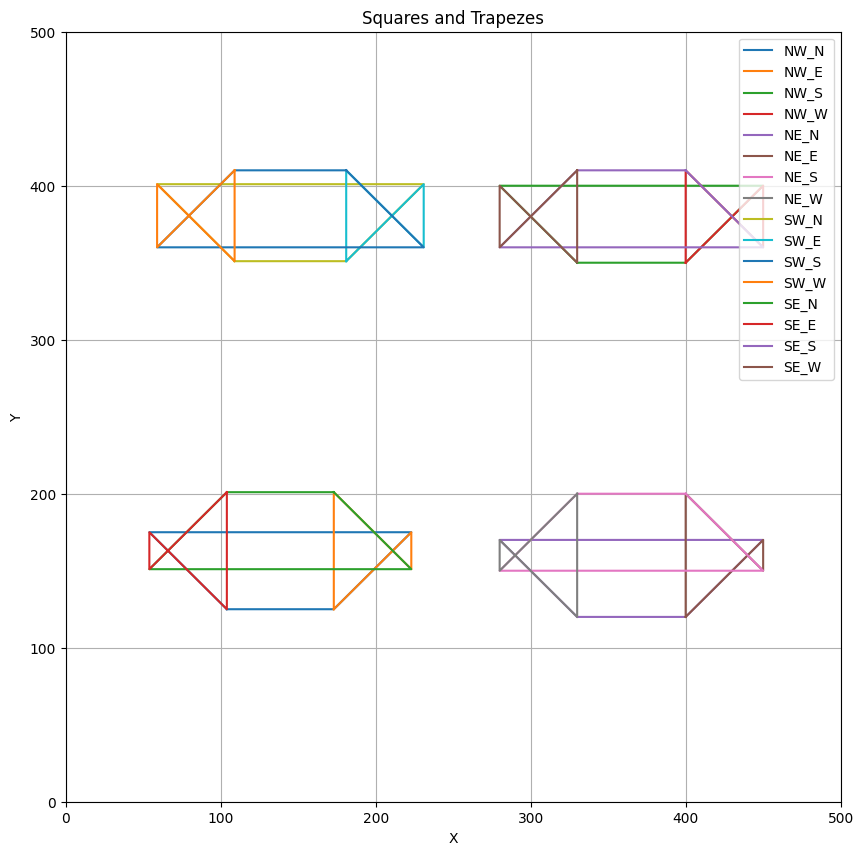

In [49]:


# Initialize plot
plt.figure(figsize=(10, 10))

# Plot each square and trapeze
for tower, trapezes in all_trapezes_coordinates.items():
    for trapeze, coordinates in trapezes.items():
        # Close the polygon by appending the first vertex
        coordinates.append(coordinates[0])
        # Extract x and y coordinates for plotting
        x_coords, y_coords = zip(*coordinates)
        plt.plot(x_coords, y_coords, label=f'{tower}_{trapeze}')

# Set plot limits and labels
plt.xlim(0, 500)
plt.ylim(0, 500)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Squares and Trapezes')
plt.grid(True)
plt.legend()

# Show plot
plt.show()


In [44]:
def trapezes_from_patch(patch, width):
    """
    generate the trapezes coordinates surrounding a patch
    inputs:
    patch - coordinates of a patch [[Xa, Ya], [Xb, Yb], [Xc, Yc], [Xd, Yd]]
    width - width of the trapeze in pixels
    outputs:
    coordinates [[Xa, Ya], [Xb, Yb], [Xc, Yc], [Xd, Yd]] for the 4 trapezes.
    
    trapezes_from_patch(SWpatch_coords, 200)
    """

    N = [patch[0], patch[1], [patch[1][0]+width, patch[1][1]+width], [patch[0][0]-width, patch[0][1]+width]]
    E = [patch[1], patch[2], [patch[2][0]+width, patch[2][1]-width], [patch[1][0]+width, patch[1][1]+width]]
    S = [patch[2], patch[3], [patch[3][0]-width, patch[3][1]-width], [patch[2][0]+width, patch[2][1]-width]]
    W = [patch[3], patch[0], [patch[0][0]-width, patch[0][1]+width], [patch[3][0]-width, patch[3][1]-width]]
    return N, E, S, W

In [46]:
RESOLUTION = 512, 512
TRAPEZE_SIZE=50

In [53]:
NWpatch_coords = [[104, RESOLUTION[1] -  125], [173, RESOLUTION[1] -  125], [173, RESOLUTION[1] -  201], [104, RESOLUTION[1] -  201]]
NEpatch_coords = [[330, RESOLUTION[1] -  120], [400, RESOLUTION[1] -  120], [400, RESOLUTION[1] -  200], [330, RESOLUTION[1] -  200]]
SWpatch_coords = [[109, RESOLUTION[1] -  351], [181, RESOLUTION[1] -  351], [181, RESOLUTION[1] -  410], [109, RESOLUTION[1] -  410]]
SEpatch_coords = [[330, RESOLUTION[1] -  350], [400, RESOLUTION[1] -  350], [400, RESOLUTION[1] -  410], [330, RESOLUTION[1] -  410]]
print(NWpatch_coords)
print(NEpatch_coords)
print(SWpatch_coords)
print(SEpatch_coords)


[[104, 387], [173, 387], [173, 311], [104, 311]]
[[330, 392], [400, 392], [400, 312], [330, 312]]
[[109, 161], [181, 161], [181, 102], [109, 102]]
[[330, 162], [400, 162], [400, 102], [330, 102]]


In [55]:
patchNW = np.array(NWpatch_coords, np.int32).reshape((-1,1,2))
print(NWpatch_coords)
print(patchNW)

[[104, 125], [173, 125], [173, 201], [104, 201]]
[[[104 125]]

 [[173 125]]

 [[173 201]]

 [[104 201]]]


In [54]:
#define the coordinates of each patch
NWpatch_coords = [[104, RESOLUTION[1] -  125], [173, RESOLUTION[1] -  125], [173, RESOLUTION[1] -  201], [104, RESOLUTION[1] -  201]]
NEpatch_coords = [[330, RESOLUTION[1] -  120], [400, RESOLUTION[1] -  120], [400, RESOLUTION[1] -  200], [330, RESOLUTION[1] -  200]]
SWpatch_coords = [[109, RESOLUTION[1] -  351], [181, RESOLUTION[1] -  351], [181, RESOLUTION[1] -  410], [109, RESOLUTION[1] -  410]]
SEpatch_coords = [[330, RESOLUTION[1] -  350], [400, RESOLUTION[1] -  350], [400, RESOLUTION[1] -  410], [330, RESOLUTION[1] -  410]]
NWpatch_coords = [[104, 125], [173, 125], [173, 201], [104, 201]]
NEpatch_coords = [[330, 120], [400, 120], [400, 200], [330, 200]]
SWpatch_coords = [[109, 351], [181, 351], [181, 410], [109, 410]]
SEpatch_coords = [[330, 350], [400, 350], [400, 410], [330, 410]]

collection_trapeze = {"NW":dict(), "NE":dict(), "SW":dict(), "SE":dict()}
collection_trapeze["NW"]["N"], collection_trapeze["NW"]["E"], collection_trapeze["NW"]["S"], collection_trapeze["NW"]["W"] = trapezes_from_patch(NWpatch_coords, TRAPEZE_SIZE)
collection_trapeze["NE"]["N"], collection_trapeze["NE"]["E"], collection_trapeze["NE"]["S"], collection_trapeze["NE"]["W"] = trapezes_from_patch(NEpatch_coords, TRAPEZE_SIZE)
collection_trapeze["SW"]["N"], collection_trapeze["SW"]["E"], collection_trapeze["SW"]["S"], collection_trapeze["SW"]["W"] = trapezes_from_patch(SWpatch_coords, TRAPEZE_SIZE)
collection_trapeze["SE"]["N"], collection_trapeze["SE"]["E"], collection_trapeze["SE"]["S"], collection_trapeze["SE"]["W"] = trapezes_from_patch(SEpatch_coords, TRAPEZE_SIZE)
print(collection_trapeze)



{'NW': {'N': [[104, 125], [173, 125], [223, 175], [54, 175]], 'E': [[173, 125], [173, 201], [223, 151], [223, 175]], 'S': [[173, 201], [104, 201], [54, 151], [223, 151]], 'W': [[104, 201], [104, 125], [54, 175], [54, 151]]}, 'NE': {'N': [[330, 120], [400, 120], [450, 170], [280, 170]], 'E': [[400, 120], [400, 200], [450, 150], [450, 170]], 'S': [[400, 200], [330, 200], [280, 150], [450, 150]], 'W': [[330, 200], [330, 120], [280, 170], [280, 150]]}, 'SW': {'N': [[109, 351], [181, 351], [231, 401], [59, 401]], 'E': [[181, 351], [181, 410], [231, 360], [231, 401]], 'S': [[181, 410], [109, 410], [59, 360], [231, 360]], 'W': [[109, 410], [109, 351], [59, 401], [59, 360]]}, 'SE': {'N': [[330, 350], [400, 350], [450, 400], [280, 400]], 'E': [[400, 350], [400, 410], [450, 360], [450, 400]], 'S': [[400, 410], [330, 410], [280, 360], [450, 360]], 'W': [[330, 410], [330, 350], [280, 400], [280, 360]]}}


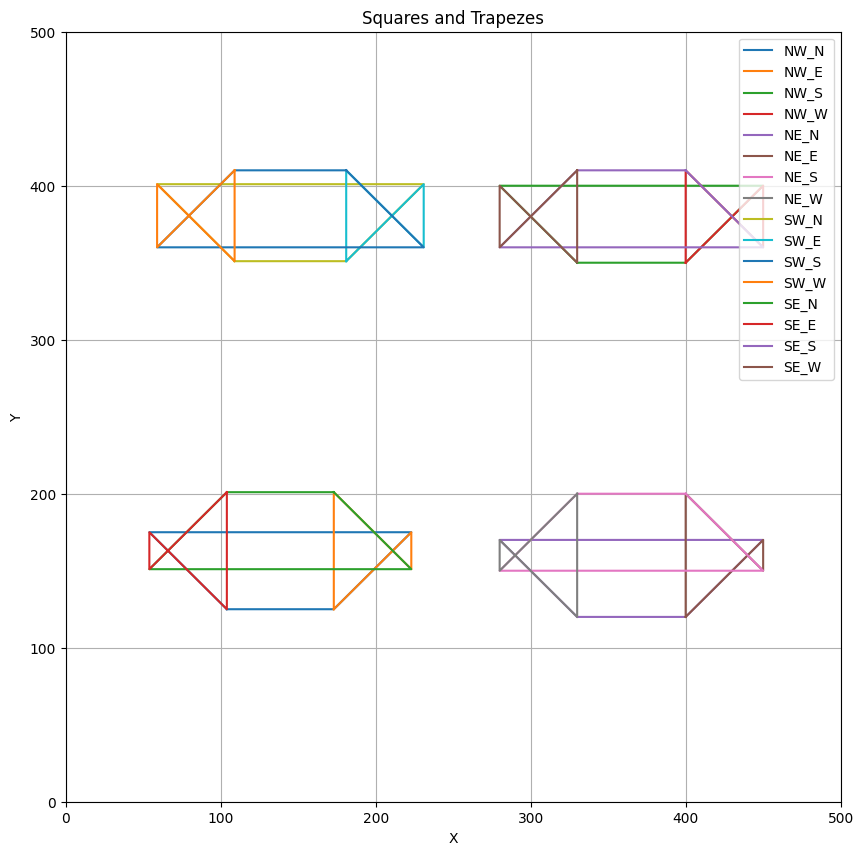

In [52]:
# Initialize plot
plt.figure(figsize=(10, 10))

# Plot each square and trapeze
for tower, trapezes in collection_trapeze.items():
    for trapeze, coordinates in trapezes.items():
        # Close the polygon by appending the first vertex
        coordinates.append(coordinates[0])
        # Extract x and y coordinates for plotting
        x_coords, y_coords = zip(*coordinates)
        plt.plot(x_coords, y_coords, label=f'{tower}_{trapeze}')

# Set plot limits and labels
plt.xlim(0, 500)
plt.ylim(0, 500)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Squares and Trapezes')
plt.grid(True)
plt.legend()

# Show plot
plt.show()